In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from pandas.stats.api import ols
matplotlib.style.use('ggplot')
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
from sklearn import linear_model
import plotly
from plotly.graph_objs import *

In [58]:
mpg_data = pd.read_csv('Ex04_Mpg_Regression.csv')
mpg_data.carname = pd.Categorical(mpg_data.carname).codes
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname           int16
dtype: object

In [59]:
#mpg_data[mpg_data.values == '?']
mpg_data = mpg_data[[np.all(values) for values in mpg_data.values!='?']]

In [60]:
mpg_data.horsepower = mpg_data.horsepower.astype('float')

In [61]:
mpg_data.shape

(391, 9)

In [5]:
columns = mpg_data.describe().columns
for col in columns:
    mpg_data[col] = mpg_data[col].apply(lambda x :(x-mpg_data[col].mean())/mpg_data[col].std())

In [6]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
count,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02,3.910000e+02
mean,1.453796e-16,-1.453796e-16,-1.817245e-17,-1.453796e-16,1.453796e-16,1.635520e-16,-5.815184e-16,2.725867e-17,3.180178e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.851422e+00,-1.447594e+00,-1.205516e+00,-1.516252e+00,-1.603674e+00,-2.739063e+00,-1.630828e+00,-7.171098e-01,-1.659675e+00
25%,-8.271115e-01,-8.604475e-01,-8.518633e-01,-7.633712e-01,-8.843226e-01,-6.349890e-01,-8.147185e-01,-7.171098e-01,-9.280770e-01
50%,-5.887823e-02,-8.604475e-01,-4.121872e-01,-2.960661e-01,-2.073211e-01,-1.827774e-02,1.391492e-03,-7.171098e-01,4.570612e-03
75%,7.093550e-01,1.488139e+00,6.726659e-01,5.346985e-01,7.531858e-01,5.440178e-01,8.175014e-01,5.235536e-01,8.590322e-01
max,2.962839e+00,1.488139e+00,2.493499e+00,3.260645e+00,2.545387e+00,3.355496e+00,1.633611e+00,1.764217e+00,1.735833e+00


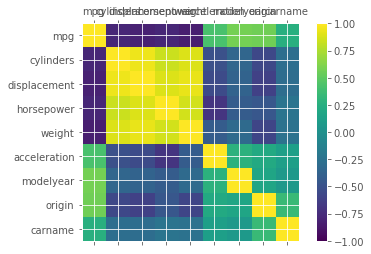

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
mpg,1.000000,-0.777643,-0.804899,-0.778165,-0.832065,0.422188,0.579960,0.564652,0.265444
cylinders,-0.777643,1.000000,0.950824,0.843315,0.898146,-0.502281,-0.341595,-0.568186,-0.273986
displacement,-0.804899,0.950824,1.000000,0.897265,0.933129,-0.542209,-0.367163,-0.613875,-0.288583
horsepower,-0.778165,0.843315,0.897265,1.000000,0.864397,-0.688857,-0.415239,-0.454509,-0.233276
weight,-0.832065,0.898146,0.933129,0.864397,1.000000,-0.415883,-0.307733,-0.584540,-0.249918
acceleration,0.422188,-0.502281,-0.542209,-0.688857,-0.415883,1.000000,0.286547,0.210975,0.131810
modelyear,0.579960,-0.341595,-0.367163,-0.415239,-0.307733,0.286547,1.000000,0.179273,0.071258
origin,0.564652,-0.568186,-0.613875,-0.454509,-0.584540,0.210975,0.179273,1.000000,0.356617
carname,0.265444,-0.273986,-0.288583,-0.233276,-0.249918,0.131810,0.071258,0.356617,1.000000


In [7]:
correlations = mpg_data.corr()
fig = plt.figure()
names = mpg_data.columns
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

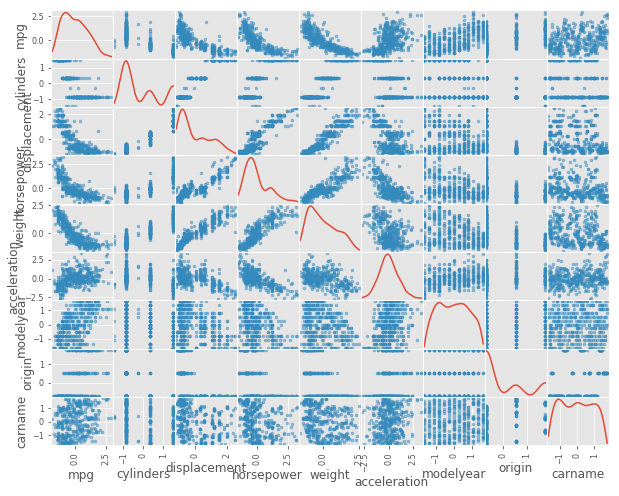

In [8]:
scatter_matrix(mpg_data, diagonal='kde', figsize=(10,8))
plt.show()

In [62]:
splitend = int(0.8 * len(mpg_data))
mpg_data_shuffled = mpg_data.sample(frac=1)
train, test = mpg_data_shuffled[:splitend], mpg_data_shuffled[splitend:]
x_train = train.ix[:, 1:]
y_train = train.ix[:, 0]
x_test = test.ix[:, 1:]
y_test = test.ix[:, 0]

## Lasso

In [63]:
alphas_lasso = np.linspace(0.0002, 1, 100)
fdf=pd.DataFrame()
model = linear_model.Lasso()
coeff = []
for a in alphas_lasso:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_lasso, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname,alphas
0,-0.585049,0.022730,-0.026777,-0.006339,0.025936,0.771944,1.592656,0.002690,0.000200
1,-0.542106,0.021811,-0.026569,-0.006343,0.023866,0.770802,1.557443,0.002736,0.010299
2,-0.499206,0.020894,-0.026360,-0.006347,0.021798,0.769659,1.522232,0.002781,0.020398
3,-0.456316,0.019977,-0.026151,-0.006351,0.019730,0.768518,1.487023,0.002827,0.030497
4,-0.413430,0.019059,-0.025942,-0.006355,0.017662,0.767375,1.451814,0.002873,0.040596


In [64]:
trace0 = Scatter(
    x = alphas_lasso,
    y = fdf['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_lasso,
    y = fdf['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_lasso,
    y = fdf['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_lasso,
    y = fdf['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_lasso,
    y = fdf['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_lasso,
    y = fdf['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_lasso,
    y = fdf['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='LassoRegression.html')

'file:///home/user/ml_regression/RegressionDatasets/MpgDataset/LassoRegression.html'

## LassoCV

In [65]:
lassocv = linear_model.LassoCV(alphas=alphas_lasso, cv=10, max_iter=100000)

In [66]:
lassocv.fit(x_train, y_train)
predictions = lassocv.predict(x_test)
for i, j in zip(x_train.columns, lassocv.coef_):
    print (i, j)

cylinders -0.413429637255
displacement 0.0190592914527
horsepower -0.0259423756807
weight -0.00635538190231
acceleration 0.0176621475635
modelyear 0.767375427278
origin 1.45181378393
carname 0.00287307564555


In [67]:
np.mean((y_test - predictions)**2)**0.5

3.3349799267521099

In [68]:
lassocv.alpha_

0.040595959595959595

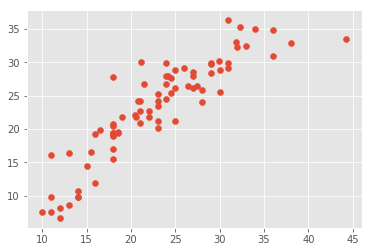

In [69]:
plt.scatter(y_test, predictions)
#plt.plot(y_test, predictions)
plt.show()

## Ridge

In [70]:
alphas_ridge = np.linspace(0.001,800,100)
fdf=pd.DataFrame()
model = linear_model.Ridge()
coeff = []
for a in alphas_ridge:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_ridge, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname,alphas
0,-0.585911,0.022748,-0.026781,-0.006338,0.025977,0.771967,1.593338,0.002689,0.001000
1,-0.517464,0.020986,-0.025420,-0.006377,0.028460,0.769878,1.471998,0.002873,8.081798
2,-0.462322,0.019528,-0.024290,-0.006409,0.030413,0.767821,1.368221,0.003030,16.162596
3,-0.417071,0.018301,-0.023341,-0.006435,0.031962,0.765791,1.278380,0.003166,24.243394
4,-0.379353,0.017253,-0.022536,-0.006457,0.033198,0.763782,1.199799,0.003285,32.324192


In [71]:
trace0 = Scatter(
    x = alphas_ridge,
    y = fdf['cylinders'],
    name = 'cylinders',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_ridge,
    y = fdf['displacement'],
    name = 'displacement',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_ridge,
    y = fdf['horsepower'],
    name = 'horsepower',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_ridge,
    y = fdf['weight'],
    name = 'weight',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_ridge,
    y = fdf['acceleration'],
    name = 'acceleration',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_ridge,
    y = fdf['modelyear'],
    name = 'modelyear',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_ridge,
    y = fdf['origin'],
    name = 'origin',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='RidgeRegression.html')

'file:///home/user/ml_regression/RegressionDatasets/MpgDataset/RidgeRegression.html'

## RidgeCV

In [72]:
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge, scoring='neg_mean_squared_error')
ridgecv.fit(x_train, y_train) 

RidgeCV(alphas=array([  1.00000e-03,   8.08180e+00, ...,   7.91919e+02,   8.00000e+02]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [73]:
predictions = ridgecv.predict(x_test)
for i, j in zip(x_train.columns, ridgecv.coef_):
    print (i, j) 

cylinders -0.517464273691
displacement 0.0209861191354
horsepower -0.025419661541
weight -0.00637699704566
acceleration 0.028460399324
modelyear 0.769877574943
origin 1.47199812427
carname 0.00287287000936


In [74]:
ridgecv.alpha_

8.0817979797979795

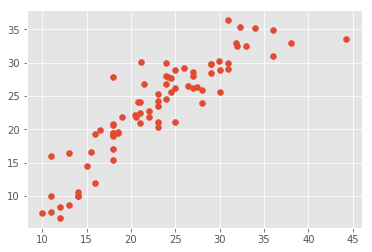

In [75]:
plt.scatter(y_test, predictions)
#plt.plot(y_test, predictions)
plt.show() 

## OLS model

In [76]:
model_ols = sm.ols(formula='mpg ~ displacement + weight + origin', data=train).fit()

In [77]:
predictions = model_ols.predict(x_test)

In [78]:
np.mean((predictions - y_test)**2)**0.5

4.3835834009053531

In [79]:
residuals = predictions - y_test

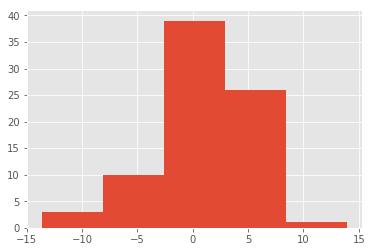

In [80]:
plt.hist(residuals, bins=5)
plt.show()

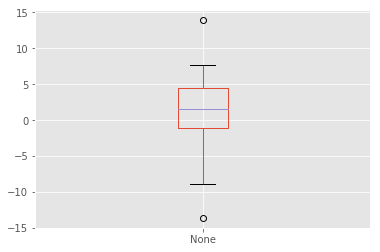

In [81]:
residuals.plot(kind='box')
plt.show()

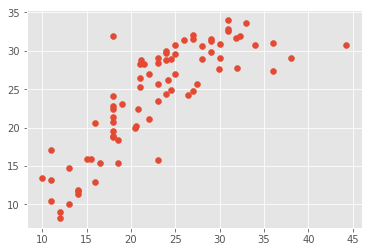

In [82]:
plt.scatter(y_test, predictions)
plt.show()